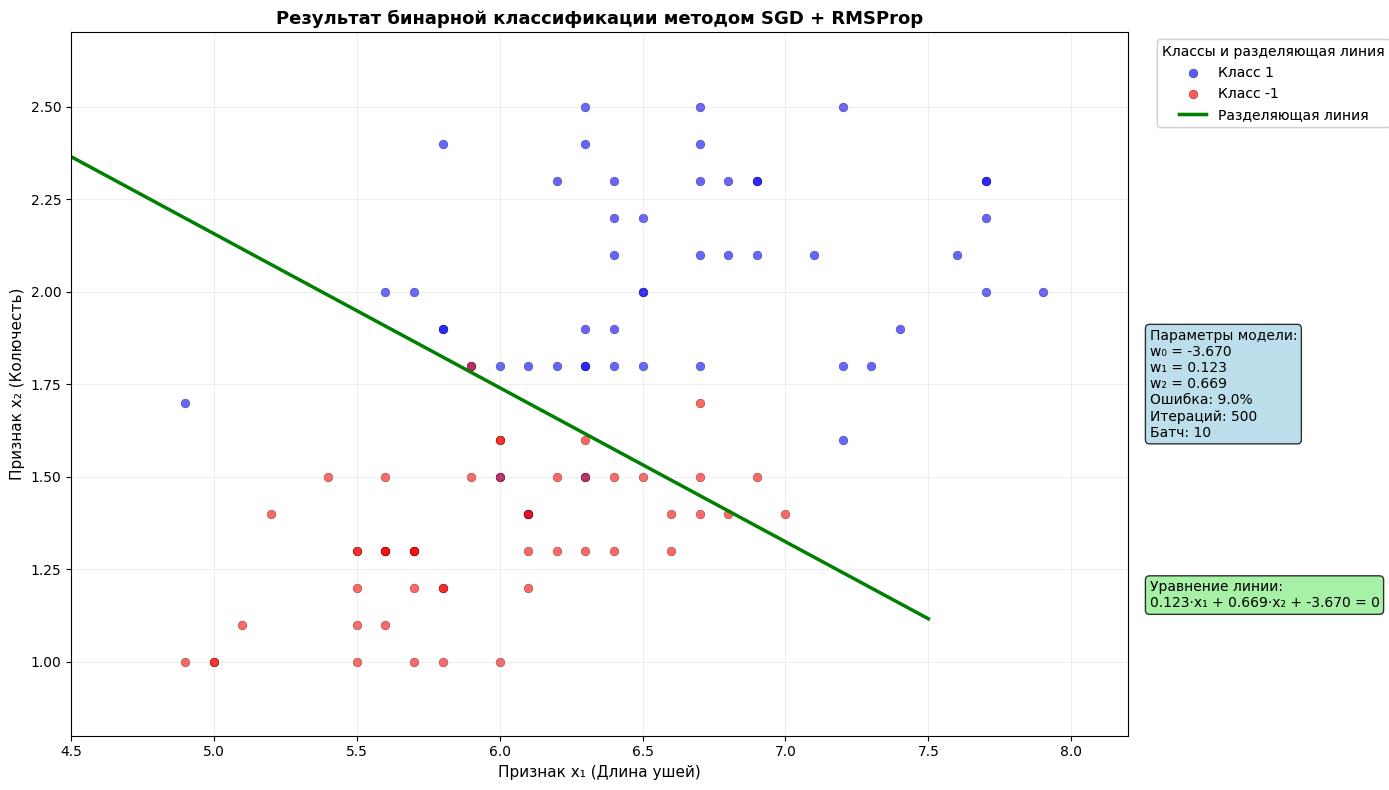

РЕЗУЛЬТАТЫ ОБУЧЕНИЯ:
Вектор параметров w: (-3.670, 0.123, 0.669, 0.050, 0.395)
Уравнение разделяющей гиперплоскости:
0.123·x1 + 0.669·x2 + 0.050·x3 + 0.395·x4 + -3.670 = 0
Точность классификации: 91.0%
Количество ошибок: 9 из 100


In [22]:
import numpy as np


# 1) Логарифмическая функция потерь
def loss(w, x, y):
    M = np.dot(w, x) * y                      # скалярное произведение + метка
    return np.log2(1 + np.exp(-M))            # логистическая потеря в логарифмах по основанию 2


# 2) Производная логарифмической функции потерь по вектору w
def df(w, x, y):
    M = np.dot(w, x) * y
    return -(np.exp(-M) * x.T * y) / ((1 + np.exp(-M)) * np.log(2))  
    # формула градиента: производная по w (вектор той же размерности, что и w)


# 3) Данные (координаты и метки классов -1/1)
data_x = [(5.8, 1.2), (5.6, 1.5), (6.5, 1.5), (6.1, 1.3), (6.4, 1.3), (7.7, 2.0), (6.0, 1.8), (5.6, 1.3), (6.0, 1.6), (5.8, 1.9), (5.7, 2.0), (6.3, 1.5), (6.2, 1.8), (7.7, 2.3), (5.8, 1.2), (6.3, 1.8), (6.0, 1.0), (6.2, 1.3), (5.7, 1.3), (6.3, 1.9), (6.7, 2.5), (5.5, 1.2), (4.9, 1.0), (6.1, 1.4), (6.0, 1.6), (7.2, 2.5), (7.3, 1.8), (6.6, 1.4), (5.6, 2.0), (5.5, 1.0), (6.4, 2.2), (5.6, 1.3), (6.6, 1.3), (6.9, 2.1), (6.8, 2.1), (5.7, 1.3), (7.0, 1.4), (6.1, 1.4), (6.1, 1.8), (6.7, 1.7), (6.0, 1.5), (6.5, 1.8), (6.4, 1.5), (6.9, 1.5), (5.6, 1.3), (6.7, 1.4), (5.8, 1.9), (6.3, 1.3), (6.7, 2.1), (6.2, 2.3), (6.3, 2.4), (6.7, 1.8), (6.4, 2.3), (6.2, 1.5), (6.1, 1.4), (7.1, 2.1), (5.7, 1.0), (6.8, 1.4), (6.8, 2.3), (5.1, 1.1), (4.9, 1.7), (5.9, 1.8), (7.4, 1.9), (6.5, 2.0), (6.7, 1.5), (6.5, 2.0), (5.8, 1.0), (6.4, 2.1), (7.6, 2.1), (5.8, 2.4), (7.7, 2.2), (6.3, 1.5), (5.0, 1.0), (6.3, 1.6), (7.7, 2.3), (6.4, 1.9), (6.5, 2.2), (5.7, 1.2), (6.9, 2.3), (5.7, 1.3), (6.1, 1.2), (5.4, 1.5), (5.2, 1.4), (6.7, 2.3), (7.9, 2.0), (5.6, 1.1), (7.2, 1.8), (5.5, 1.3), (7.2, 1.6), (6.3, 2.5), (6.3, 1.8), (6.7, 2.4), (5.0, 1.0), (6.4, 1.8), (6.9, 2.3), (5.5, 1.3), (5.5, 1.1), (5.9, 1.5), (6.0, 1.5), (5.9, 1.8)]
data_y = [-1, -1, -1, -1, -1, 1, 1, -1, -1, 1, 1, -1, 1, 1, -1, 1, -1, -1, -1, 1, 1, -1, -1, -1, -1, 1, 1, -1, 1, -1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, 1, 1, -1, -1, -1, -1, 1, -1, 1, 1, 1, 1, 1, -1, -1, 1, -1, -1, 1, -1, 1, -1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, -1, 1, -1, -1, -1, -1, 1, 1, -1, 1, -1, 1, 1, 1, 1, -1, 1, 1, -1, -1, -1, -1, 1]

# 4) Признаки: добавляем константу 1 для w0, два исходных признака и два новых (x0*0.8, (x0+x1)/2)
x_train = np.array([[1, x[0], x[1], 0.8*x[0], (x[0]+x[1])/2] for x in data_x])
y_train = np.array(data_y)

# 5) Параметры обучения
n_train = len(x_train)                  # размер обучающей выборки
w = np.zeros(len(x_train[0]))           # начальные веса (нулевые)
nt = np.array([0.5] + [0.01] * (len(w)-1))  # шаги обучения (для w0 больше, чем для остальных)
lm = 0.01                               # λ для экспоненциального сглаживания
N = 500                                 # число итераций SGD
batch_size = 10                         # размер мини-батча
lm_l1 = 0.05                            # λ для L1-регуляризации

# 6) Начальное значение Qe (средний эмпирический риск на всей выборке)
Qe = np.mean([loss(w, x, y) for x, y in zip(x_train, y_train)])
np.random.seed(0)                       # фиксируем случайность для воспроизводимости

# 7) Основной цикл SGD
for i in range(N):

    k = np.random.randint(0, n_train - batch_size - 1)   # случайная позиция для мини-батча
    
    batch_x = x_train[k:k+batch_size]   # выбираем подмножество признаков
    batch_y = y_train[k:k+batch_size]   # соответствующие метки
    
    tilde_w = w.copy()                  # копируем веса
    tilde_w[0] = 0                      # w0 не участвует в регуляризации
    
    grad_sum, loss_sum = 0, 0           # аккумуляторы для суммы градиентов и потерь
    
    # проходим по каждому элементу мини-батча
    for j in range(k, k+batch_size):
        grad_sum += df(w, x_train[j], y_train[j])   # накапливаем градиент
        loss_sum += loss(w, x_train[j], y_train[j]) # накапливаем потери
        
    grad = grad_sum / batch_size        # усреднённый градиент по батчу
    Qk = loss_sum / batch_size          # усреднённая потеря на батче
    
    Qe = lm * Qk + (1 - lm) * Qe        # обновление скользящего среднего потерь
    
    # обновление весов с учётом L1-регуляризации
    w = w - nt * (grad + lm_l1 * np.sign(tilde_w))
    
# 8) Финальная ошибка классификации Q (доля неверных предсказаний)
Q = np.mean(x_train @ w * y_train < 0)

import matplotlib.pyplot as plt

# 6) Визуализация результатов
plt.figure(figsize=(14, 8))  # Увеличиваем ширину для двух легенд

# Разделяем данные по классам
class_1_x = [x[1] for i, x in enumerate(x_train) if y_train[i] == 1]
class_1_y = [x[2] for i, x in enumerate(x_train) if y_train[i] == 1]
class_minus1_x = [x[1] for i, x in enumerate(x_train) if y_train[i] == -1]
class_minus1_y = [x[2] for i, x in enumerate(x_train) if y_train[i] == -1]

# Рисуем точки данных с меньшим размером и прозрачностью
plt.scatter(class_1_x, class_1_y, c='blue', s=40, alpha=0.6, label='Класс 1', edgecolors='black', linewidth=0.3)
plt.scatter(class_minus1_x, class_minus1_y, c='red', s=40, alpha=0.6, label='Класс -1', edgecolors='black', linewidth=0.3)

# Рисуем разделяющую линию
x1_range = np.linspace(2.5, 7.5, 100)  # Уменьшаем диапазон для лучшего масштаба
x2_line = x2_line = (-w[0] - w[1]*x1_range - w[3]*(0.8*x1_range) - w[4]*((x1_range)/2)) / (w[2] + 0.5*w[4])

plt.plot(x1_range, x2_line, 'green', linewidth=2.5, label='Разделяющая линия')

# Настраиваем оси для лучшего масштаба
plt.xlim(4.5, 8.2)  # Уменьшаем масштаб по x
plt.ylim(0.8, 2.7)   # Уменьшаем масштаб по y

# Настраиваем внешний вид
plt.xlabel('Признак x₁ (Длина ушей)', fontsize=11)
plt.ylabel('Признак x₂ (Колючесть)', fontsize=11)
plt.title('Результат бинарной классификации методом SGD + RMSProp', fontsize=13, fontweight='bold')
plt.grid(True, alpha=0.2)

# ПЕРВАЯ ЛЕГЕНДА: классы и линия
legend1 = plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', title="Классы и разделяющая линия")
plt.gca().add_artist(legend1)  # Добавляем первую легенду, чтобы не перезаписалась

# ВТОРАЯ ЛЕГЕНДА: параметры модели (в виде текста)
param_text = (
    f'Параметры модели:\n'
    f'w₀ = {w[0]:.3f}\n'
    f'w₁ = {w[1]:.3f}\n'
    f'w₂ = {w[2]:.3f}\n'
    f'Ошибка: {Q:.1%}\n'
    f'Итераций: {N}\n'
    f'Батч: {batch_size}'
)

# Создаем вторую легенду как текстовый блок
props = dict(boxstyle='round', facecolor='lightblue', alpha=0.8)
plt.text(1.02, 0.5, param_text, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='center', bbox=props)

# Третья информационная панель с уравнением
equation_text = f'Уравнение линии:\n{w[1]:.3f}·x₁ + {w[2]:.3f}·x₂ + {w[0]:.3f} = 0'
plt.text(1.02, 0.2, equation_text, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='center', bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8))

plt.tight_layout()

plt.show()

# Дополнительная информация в консоли
print("="*50)
print("РЕЗУЛЬТАТЫ ОБУЧЕНИЯ:")
print("="*50)
print(f"Вектор параметров w: ({w[0]:.3f}, {w[1]:.3f}, {w[2]:.3f}, {w[3]:.3f}, {w[4]:.3f})")
print("Уравнение разделяющей гиперплоскости:")
terms = [f"{w[i]:.3f}·x{i}" for i in range(1, len(w))]
equation = " + ".join(terms) + f" + {w[0]:.3f} = 0"
print(equation)
print(f"Точность классификации: {(1-Q):.1%}")
print(f"Количество ошибок: {int(Q * n_train)} из {n_train}")
print("="*50)